In [2]:
from pathlib import Path
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.insert(1, "..")
from slice_segthor import *

In [6]:
def slice_patient_3d(id_: str, dest_path: Path, source_path: Path, shape: tuple[int, int],
                  test_mode: bool = False) -> tuple[float, float, float]:
    id_path: Path = source_path / ("train" if not test_mode else "test") / id_

    ct_path: Path = (id_path / f"{id_}.nii.gz") if not test_mode else (source_path / "test" / f"{id_}.nii.gz")
    nib_obj = nib.load(str(ct_path))
    ct: np.ndarray = np.asarray(nib_obj.dataobj)
    # dx, dy, dz = nib_obj.header.get_zooms()
    x, y, z = ct.shape
    dx, dy, dz = nib_obj.header.get_zooms()
    z_layers = np.asarray(nib_obj.dataobj).shape[2]
    print(z_layers, 'layers of', dz, 'mm')
    # return dz * z_layers

    # print(dx, dy, dz)

    # assert sanity_ct(ct, *ct.shape, *nib_obj.header.get_zooms())

    # gt: np.ndarray
    # if not test_mode:
    #     gt_path: Path = id_path / "GT.nii.gz"
    #     gt_nib = nib.load(str(gt_path))
    #     # print(nib_obj.affine, gt_nib.affine)
    #     gt = np.asarray(gt_nib.dataobj)
    #     assert sanity_gt(gt, ct)
    # else:
    #     gt = np.zeros_like(ct, dtype=np.uint8)

    # norm_ct: np.ndarray = norm_arr(ct)

    # to_slice_ct = norm_ct
    # to_slice_gt = gt

    # return (dx, dy, dz), to_slice_ct

def patients():
    for i in range(1, 41):
        yield "Patient_{:02}".format(i)

sizes = []
for id_ in patients():
    s = slice_patient_3d(id_, Path("temp"), Path("..")/"data"/"segthor_train", (10, 10))
    sizes.append(s)
print(max(sizes))

229 layers of 2.0 mm
246 layers of 2.5 mm
147 layers of 2.5 mm
158 layers of 2.5 mm
284 layers of 2.0 mm
199 layers of 2.5 mm
179 layers of 2.0 mm
171 layers of 2.5 mm
154 layers of 2.5 mm
163 layers of 2.0 mm
180 layers of 2.5 mm
171 layers of 2.0 mm
228 layers of 2.0 mm
162 layers of 2.5 mm
150 layers of 2.5 mm
166 layers of 2.5 mm
166 layers of 2.5 mm
183 layers of 2.5 mm
190 layers of 2.5 mm
206 layers of 2.5 mm
158 layers of 2.5 mm
181 layers of 2.5 mm
153 layers of 2.5 mm
168 layers of 2.5 mm
150 layers of 2.5 mm
247 layers of 2.0 mm
213 layers of 2.0 mm
179 layers of 2.5 mm
173 layers of 2.5 mm
171 layers of 2.5 mm
148 layers of 2.5 mm
157 layers of 2.5 mm
263 layers of 2.0 mm
192 layers of 2.5 mm
181 layers of 2.0 mm
188 layers of 2.0 mm
176 layers of 2.5 mm
159 layers of 2.5 mm
228 layers of 2.0 mm
203 layers of 2.5 mm
615.0


In [10]:
import matplotlib.pyplot as plt
import scipy

In [7]:
(dx, dy, dz), array = slice_patient_3d("Patient_02", Path("temp"), Path("..")/"data"/"segthor_train", (10, 10))

246 layers of 2.5 mm


TypeError: cannot unpack non-iterable numpy.float64 object

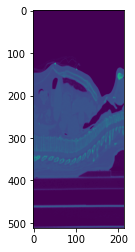

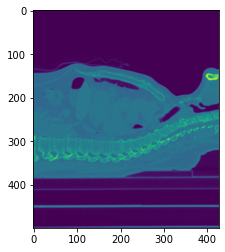

In [12]:
plt.imshow(array[256,:,:])
plt.show()

t_array = scipy.ndimage.zoom(array, [dx, dy, dz])
plt.imshow(t_array[256,:,:])
plt.show()

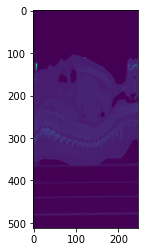

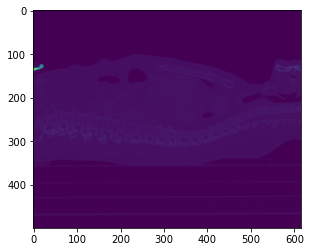

In [15]:
plt.imshow(array[256,:,:])
plt.show()

t_array = scipy.ndimage.zoom(array, [dx, dy, dz])
plt.imshow(t_array[256,:,:])
plt.show()